<h1> SETUP </h1>

In [1]:
import torch
import os
import cv2
import supervision as sv
from typing import List
import numpy as np
import matplotlib.pyplot as plt
import cv2

from groundingdino.util.inference import Model

import sys

def include_utils():
    parent_directory = os.path.abspath('/app/utils')
    sys.path.append(parent_directory)

include_utils()

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(DEVICE)

from utils.gdsr_utils import sam_segmentor, resnet_embedder,  get_gdino_model, check_model_paths
check_model_paths()


cuda
../bin/model_files/groundingdino_swint_ogc.pth  exists
../GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py  exists
../bin/model_files/sam_vit_h_4b8939.pth  exists


## Loading the Object detection, segmentation and the embedding models

In [2]:
detector = get_gdino_model()
segmentor = sam_segmentor()
embeddor = resnet_embedder()

/opt/conda/lib/python3.7/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1634272168290/work/aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


## obtaining detection masks, Taking object crops, extracting embeddings, and saving embeddings and relevant details as pickle files

['/app/data/images/embedding_tester/aeroplane.jpg', '/app/data/images/embedding_tester/aeroplane_2.jpg', '/app/data/images/embedding_tester/aeroplane_3.jpg', '/app/data/images/embedding_tester/apple_1.jpeg', '/app/data/images/embedding_tester/apple_2.jpg', '/app/data/images/embedding_tester/apple_3.jpg', '/app/data/images/embedding_tester/dog_1.jpg', '/app/data/images/embedding_tester/dog_2.jpg', '/app/data/images/embedding_tester/dog_3.jpg']

classes : ['apple', 'aeroplane', 'dog']


image path : /app/data/images/embedding_tester/aeroplane.jpg

results : 
 aeroplane : 1

num detections : 1

masks available True


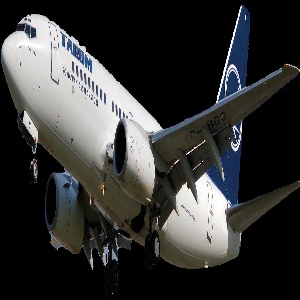

embedding_matrix shape : (1, 2048)


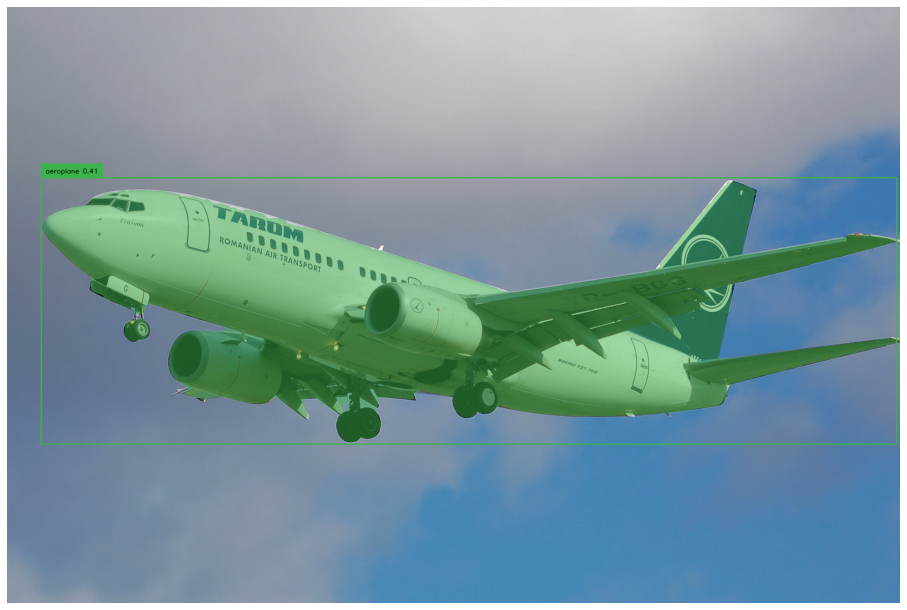


image path : /app/data/images/embedding_tester/aeroplane_2.jpg

results : 
 aeroplane : 1

num detections : 1

masks available True


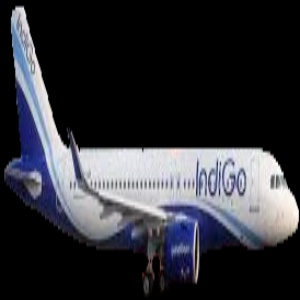

embedding_matrix shape : (2, 2048)


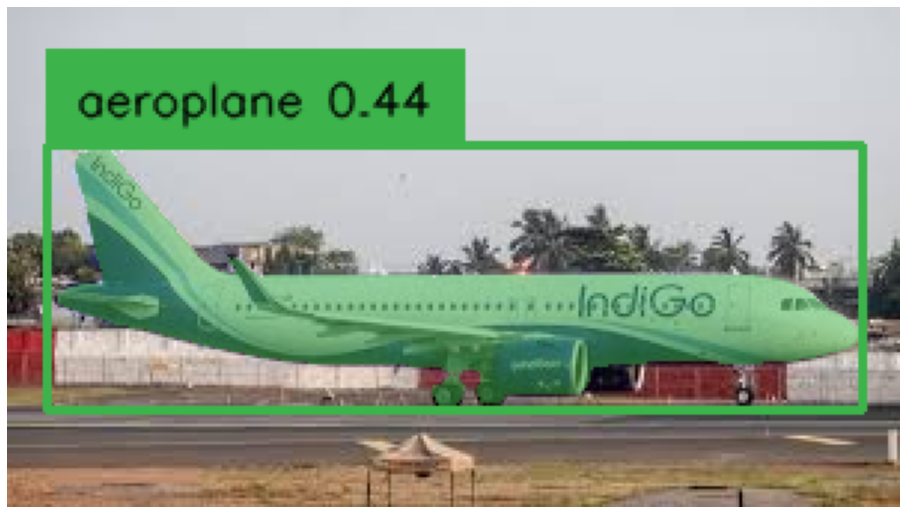


image path : /app/data/images/embedding_tester/aeroplane_3.jpg

results : 
 aeroplane : 1

num detections : 1

masks available True


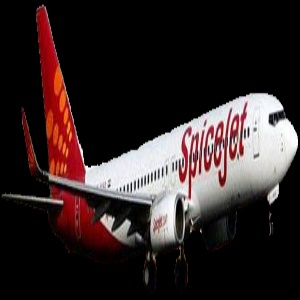

embedding_matrix shape : (3, 2048)


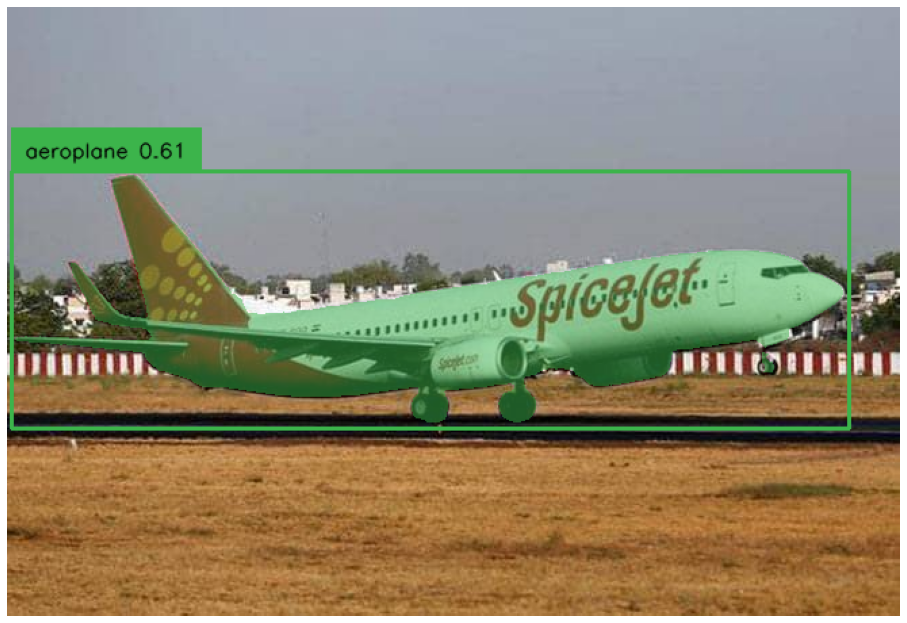


image path : /app/data/images/embedding_tester/apple_1.jpeg

results : 
 apple : 1

num detections : 1

masks available True


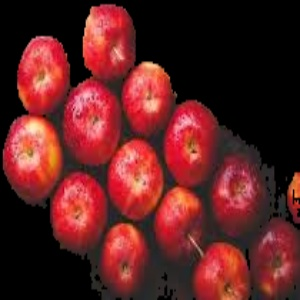

embedding_matrix shape : (4, 2048)


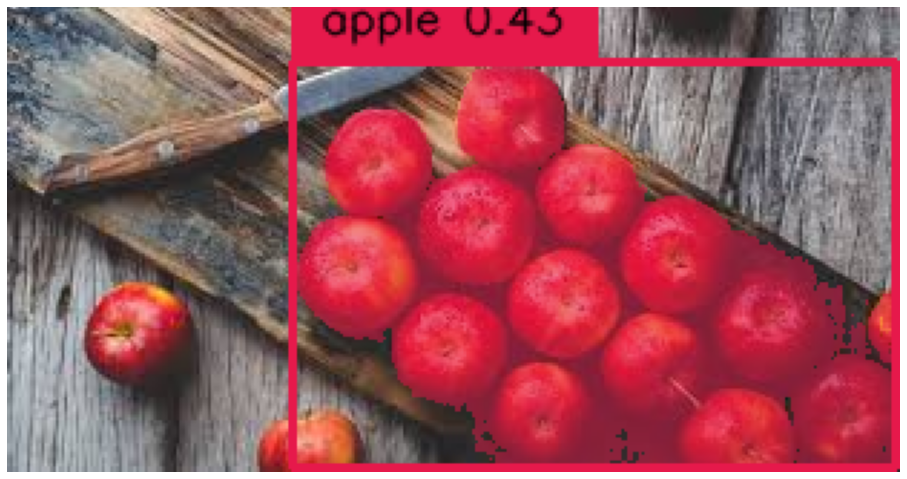


image path : /app/data/images/embedding_tester/apple_2.jpg

results : 
 apple : 10

num detections : 10

masks available True


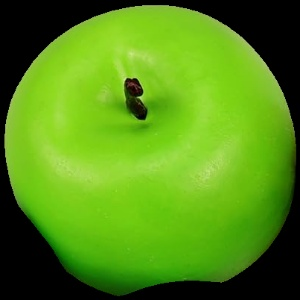

masks available True


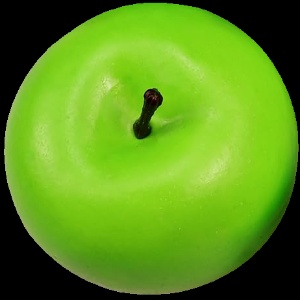

masks available True


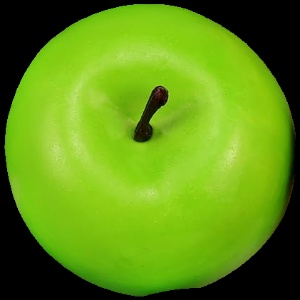

masks available True


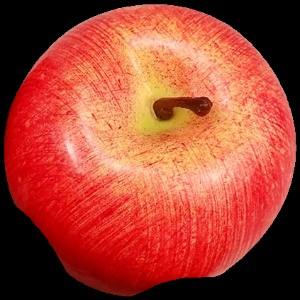

masks available True


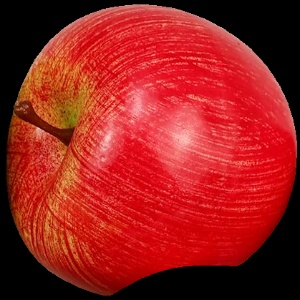

masks available True


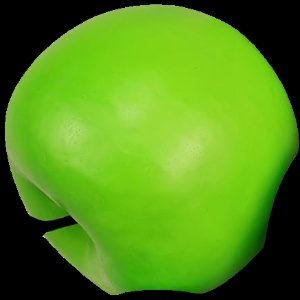

masks available True


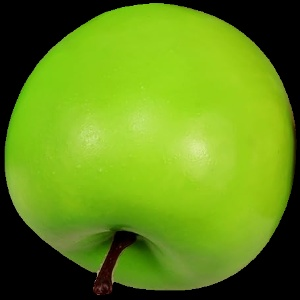

masks available True


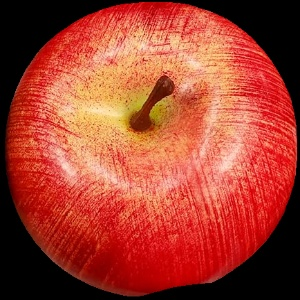

masks available True


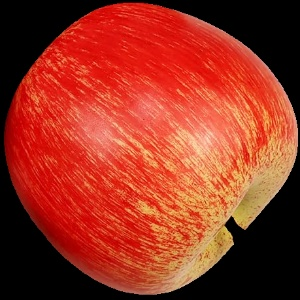

masks available True


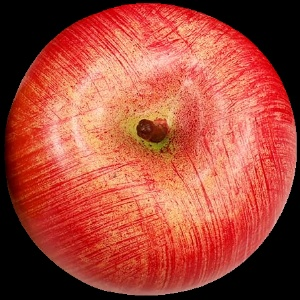

embedding_matrix shape : (14, 2048)


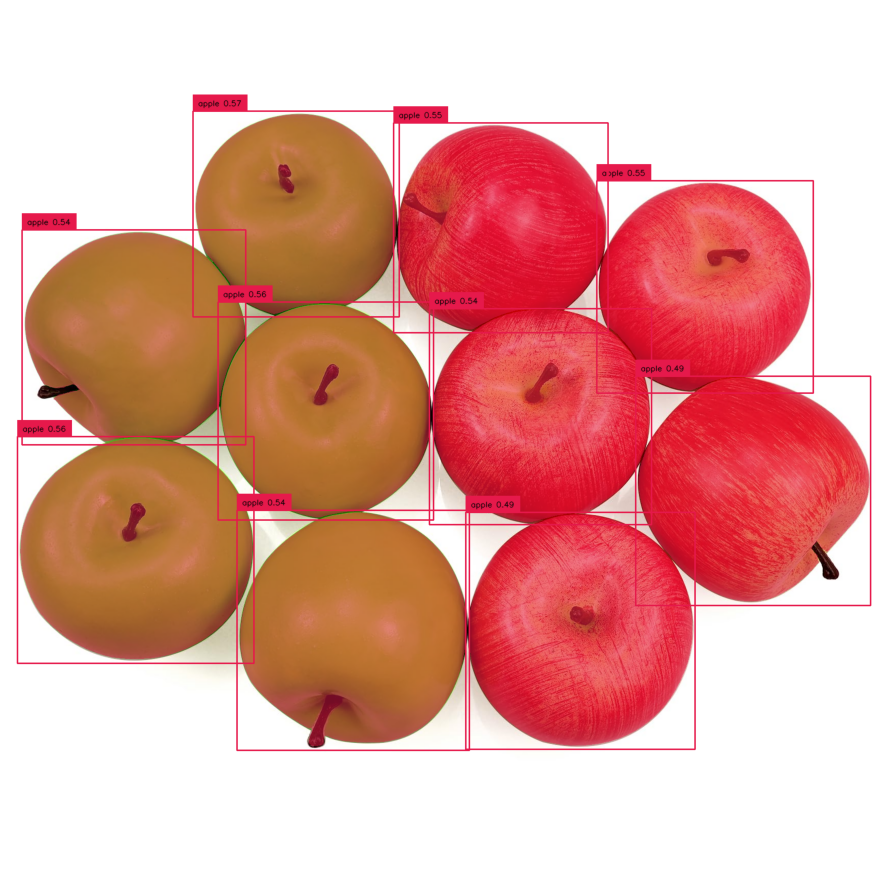


image path : /app/data/images/embedding_tester/apple_3.jpg


image path : /app/data/images/embedding_tester/dog_1.jpg

results : 
 dog : 1

num detections : 1

masks available True


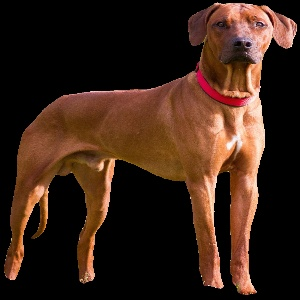

embedding_matrix shape : (15, 2048)


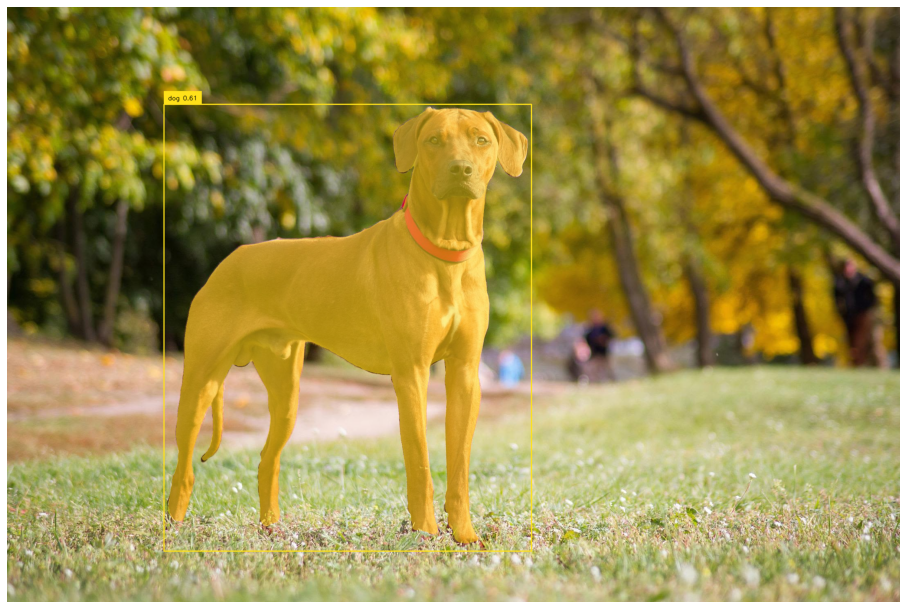


image path : /app/data/images/embedding_tester/dog_2.jpg

results : 
 dog : 1

num detections : 1

masks available True


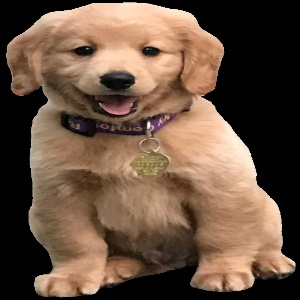

embedding_matrix shape : (16, 2048)


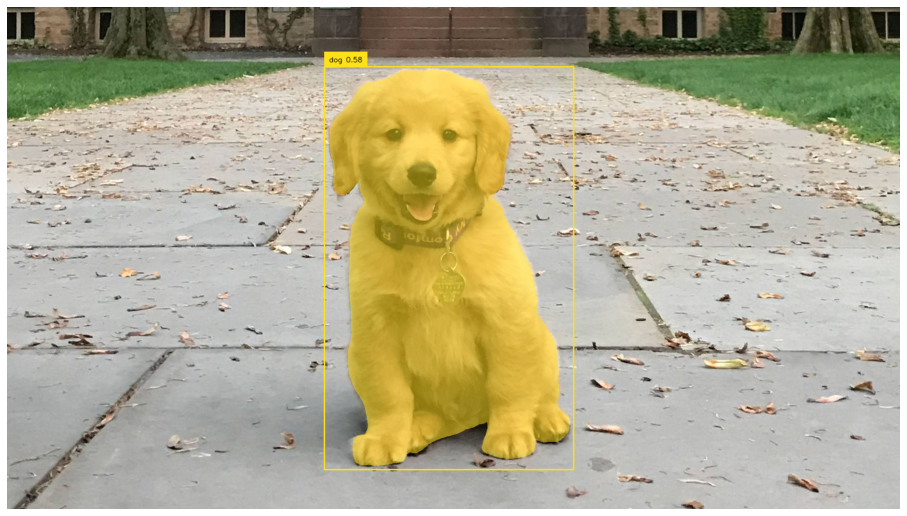


image path : /app/data/images/embedding_tester/dog_3.jpg

results : 
 dog : 1

num detections : 1

masks available True


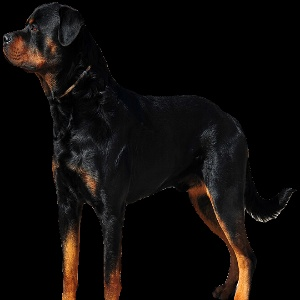

embedding_matrix shape : (17, 2048)


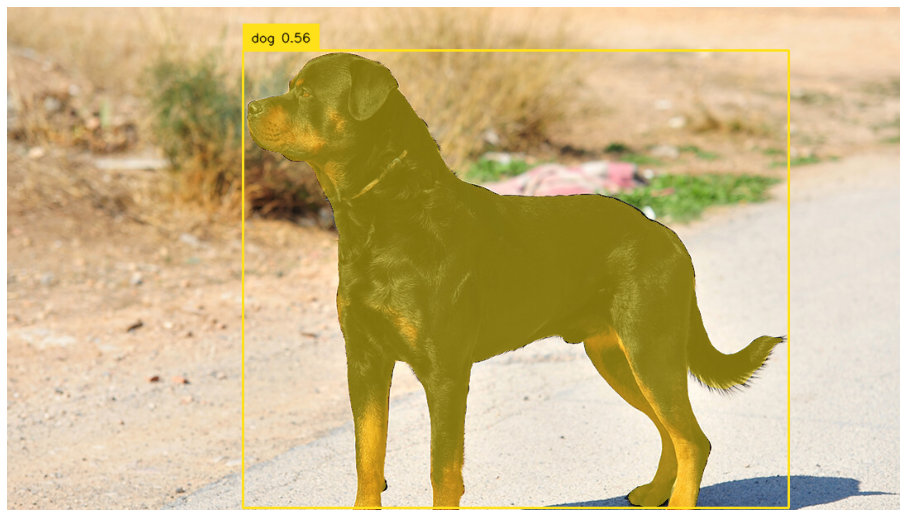


saved file name : bf0a8f0be08854a59dccf7b0ba0bb93f_gdsr



In [4]:
import os
from utils.model_utils import object_embedder

test_class = object_embedder(segmentor,
                             detector,
                             embeddor)

dir_path = "/app/data/images/embedding_tester/"
image_paths = [os.path.join(dir_path, im_path) for im_path in os.listdir(dir_path)]
print(image_paths)
classes = ["apple", "aeroplane", "dog"]

test_class.detect_objects(image_paths, classes, viz_outputs = True, do_segment = True, model_type = 'gdsr')
# test_class.detect_objects(["/app/data/images/road_traffic_1.jpg"], classes, viz_outputs = True)
